In [10]:
import networkx as nx
import pandas as pd
from typing import List, Dict, Set

In [11]:
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv')
df = df.drop(df.columns[1],axis=1)
grouped_df = df.groupby('Member_number')['itemDescription'].apply(list).reset_index()
customer_list = grouped_df[grouped_df.columns[-1]].tolist()


In [12]:
from itertools import combinations
import pandas as pd



# A dictionary to hold the edges and their weights
customer_edges = {}

for transaction in customer_list:
    # Get all combinations of item pairs from each transaction
    for item_pair in combinations(transaction, 2):
        # Check if both items are the same, if so, skip this pair
        if item_pair[0] == item_pair[1]:
            continue
        # Use a frozenset to ensure that order doesn't matter and we don't get duplicates
        item_pair_set = frozenset(item_pair)
        # Increment the weight of the edge by 1
        customer_edges[item_pair_set] = customer_edges.get(item_pair_set, 0) + 1

# Convert the dictionary to a list of edges and sort by weight in descending order
edges_list = [{'source': list(edge)[0], 'dest': list(edge)[1], 'weight': weight} 
              for edge, weight in sorted(customer_edges.items(), key=lambda item: item[1], reverse=True)]

# Convert the list of edges to a DataFrame
edges_df = pd.DataFrame(edges_list)

# Save the DataFrame to a CSV file
edges_df.to_csv('processed_item_pairs.csv', index=False)


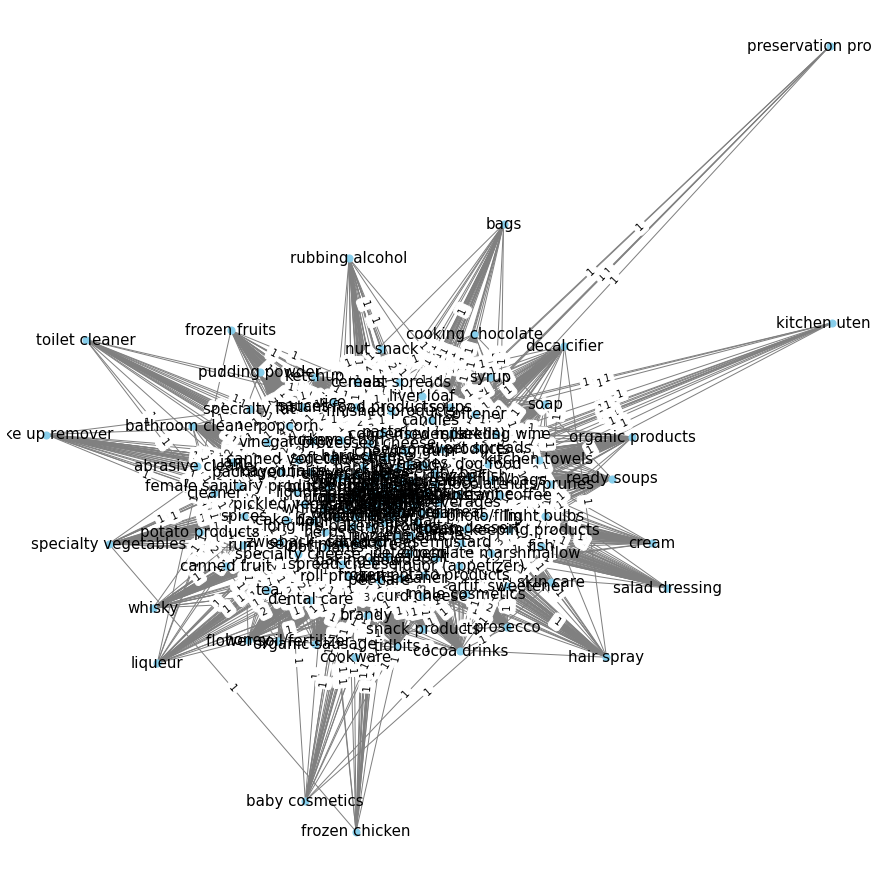

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
edges_df = pd.read_csv('processed_item_pairs.csv')

# Create a graph from the pandas edge list
G = nx.from_pandas_edgelist(edges_df, 'source', 'dest', ['weight'])

# Draw the graph
plt.figure(figsize=(12, 12))  # Set the size of the plot
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=50, edge_color='gray', linewidths=1, font_size=15)

# If you want to see the weights on the edges, you can use the following line
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


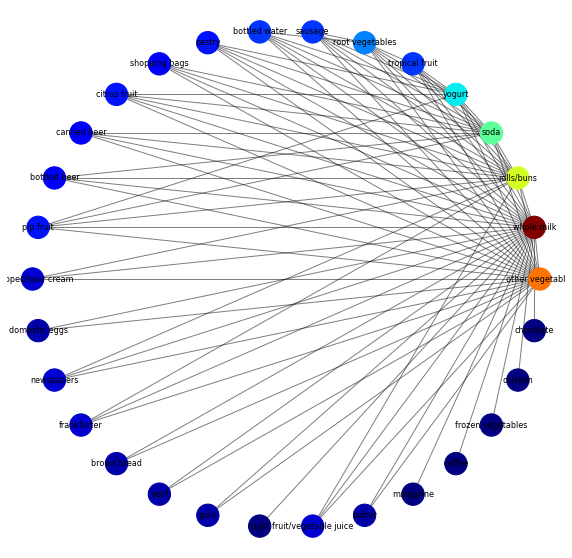

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Assuming edges_df is your DataFrame created from the CSV as before
edges_df = pd.read_csv('processed_item_pairs.csv')

#keeps edges with weight above 300
filtered_edges_df = edges_df[edges_df['weight'] > 300]

# Create a graph from the pandas edge list
G = nx.from_pandas_edgelist(filtered_edges_df, 'source', 'dest', 'weight')

# Assign colors to the nodes based on a property, for example, degree of the node
# This is just an example, replace it with your actual logic for coloring nodes
node_color = [G.degree(v) for v in G]

# Calculate the layout for our nodes 
layout = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(10, 10))  # Set the size of the plot
nx.draw_networkx_nodes(G, layout, node_color=node_color, cmap=plt.get_cmap('jet'), node_size=500)
nx.draw_networkx_labels(G, layout, font_size=8)
nx.draw_networkx_edges(G, layout, width=1, alpha=0.5)

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()
